In [1]:
from google.colab import drive
drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/Wholesale customers data.csv'

import pandas as pd
df = pd.read_csv(ruta_archivo)

df.head()

Mounted at /content/drive


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
import pandas as pd

# Exploración inicial del dataset
print(df.info())
print(df.describe())

# Variables importantes para el agrupamiento (basado en la exploración inicial)
# Se consideran las variables de gasto anual en las distintas categorías de productos.
# Se excluyen las variables "Channel" y "Region" ya que son categóricas.

variables_importantes = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Mostrar las primeras filas del DataFrame con las variables seleccionadas
print(df[variables_importantes].head())

# Análisis de correlación entre las variables
correlation_matrix = df[variables_importantes].corr()
correlation_matrix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   cluster           440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.0

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [7]:
# prompt: Exploración y preprocesamiento de datos:
#   – Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.
#   – Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
#   – Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

drive.mount('/content/drive')

ruta_archivo = '/content/drive/My Drive/Colab Notebooks/Dataset/Wholesale customers data.csv'

df = pd.read_csv(ruta_archivo)

# Exploración inicial del dataset (ya incluida en el código original)
print(df.info())
print(df.describe())

# Variables importantes para el agrupamiento
variables_importantes = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Estandarización de los datos
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(df[variables_importantes])

# Detección de outliers con IQR (Interquartile Range)
Q1 = df[variables_importantes].quantile(0.25)
Q3 = df[variables_importantes].quantile(0.75)
IQR = Q3 - Q1
df_outliers = df[~((df[variables_importantes] < (Q1 - 1.5 * IQR)) |(df[variables_importantes] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Estandarización de los datos sin outliers
scaler_no_outliers = StandardScaler()
datos_escalados_no_outliers = scaler_no_outliers.fit_transform(df_outliers[variables_importantes])


# Aplicar DBSCAN (ejemplo, ajusta los parámetros eps y min_samples según tus datos)
dbscan = DBSCAN(eps=0.5, min_samples=5) # Ajusta eps y min_samples
clusters = dbscan.fit_predict(datos_escalados_no_outliers)

# Agregar los clusters al DataFrame original (sin outliers)
df_outliers['cluster'] = clusters

# Mostrar los resultados
print(df_outliers.head())
print(df_outliers['cluster'].value_counts())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865 

<ipython-input-7-d0241148d65c>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


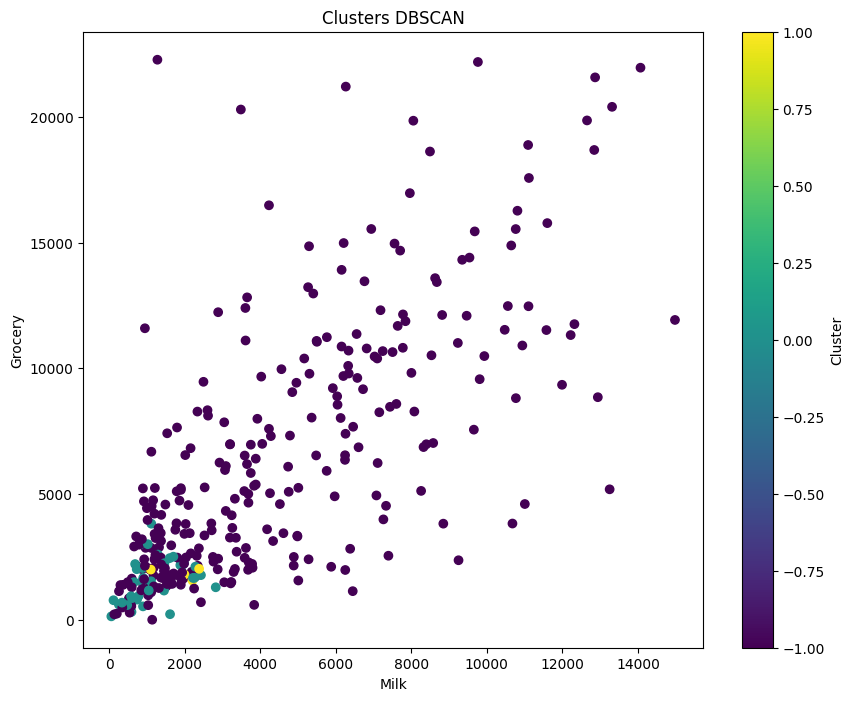

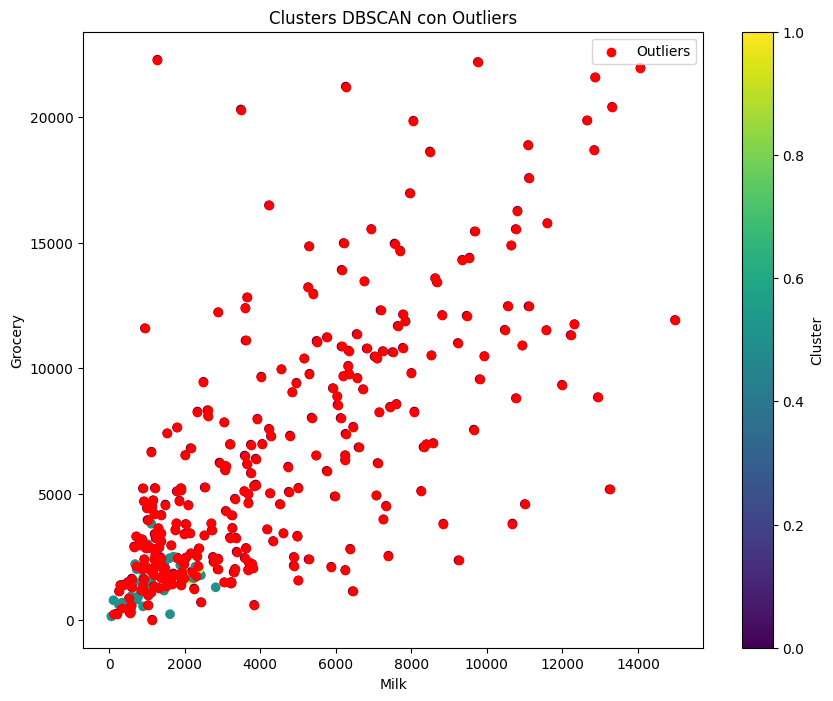

<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


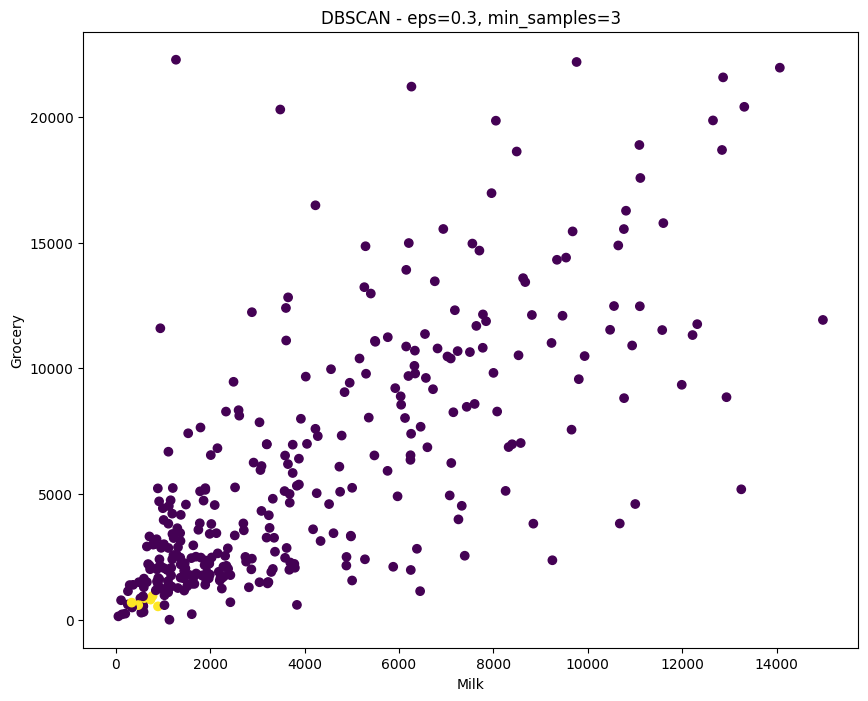

Para eps=0.3 y min_samples=3:
cluster
-1    326
 0      6
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


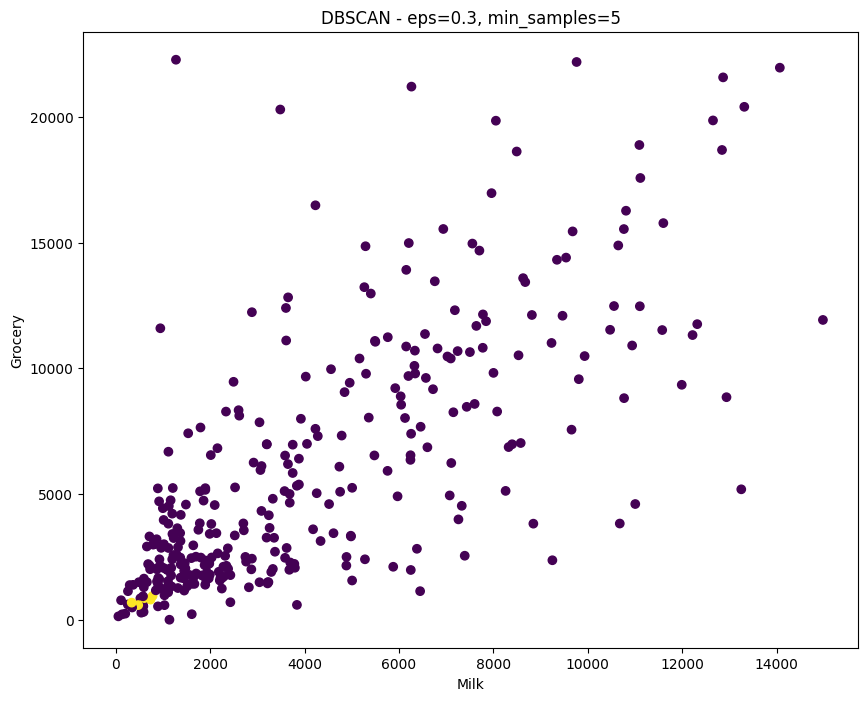

Para eps=0.3 y min_samples=5:
cluster
-1    327
 0      5
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


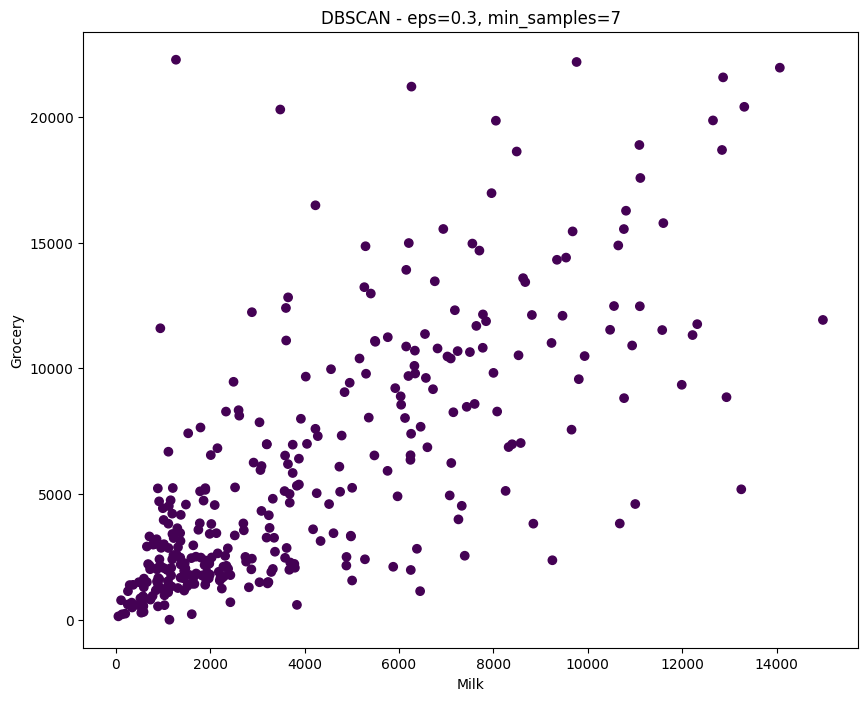

Para eps=0.3 y min_samples=7:
cluster
-1    332
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


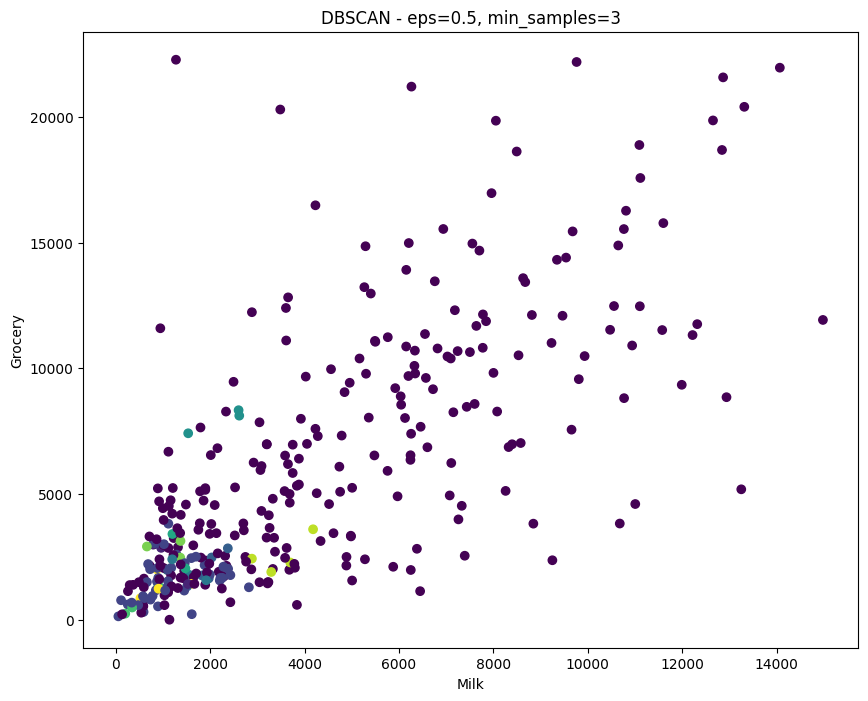

Para eps=0.5 y min_samples=3:
cluster
-1    256
 1     44
 2      6
 9      4
 8      4
 0      3
 4      3
 3      3
 5      3
 6      3
 7      3
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


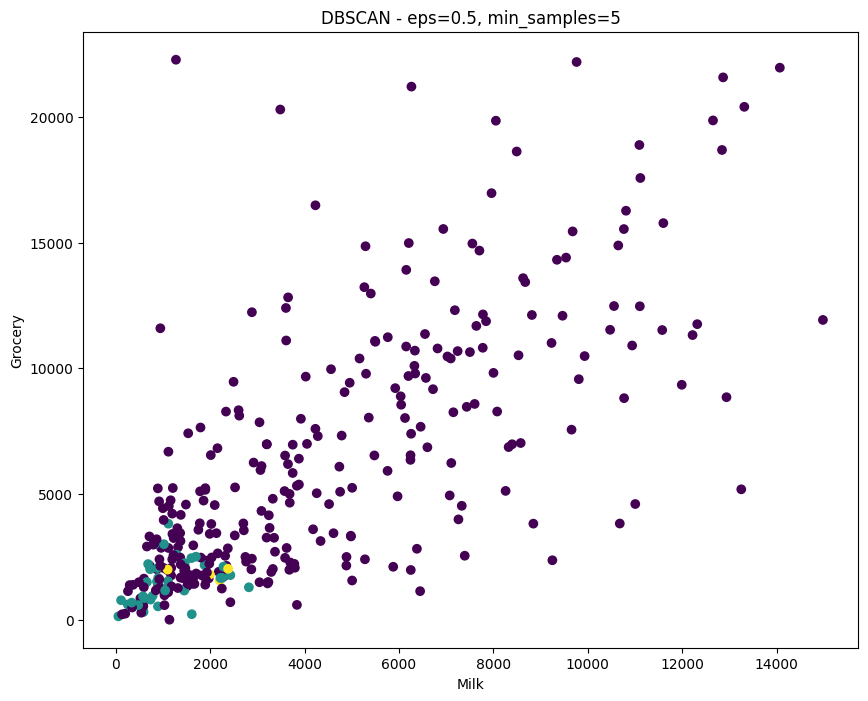

Para eps=0.5 y min_samples=5:
cluster
-1    291
 0     37
 1      4
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


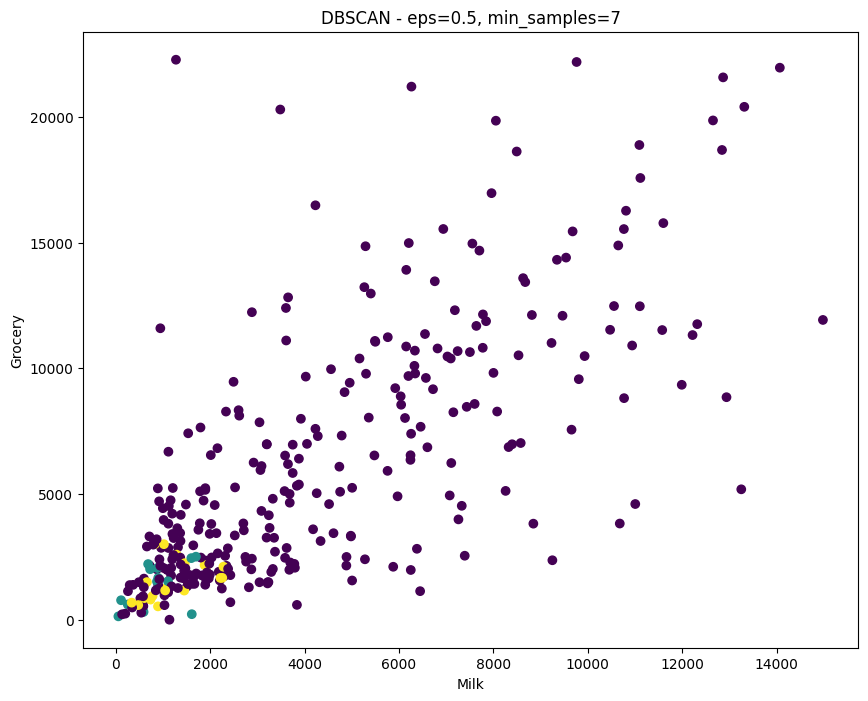

Para eps=0.5 y min_samples=7:
cluster
-1    299
 1     19
 0     14
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


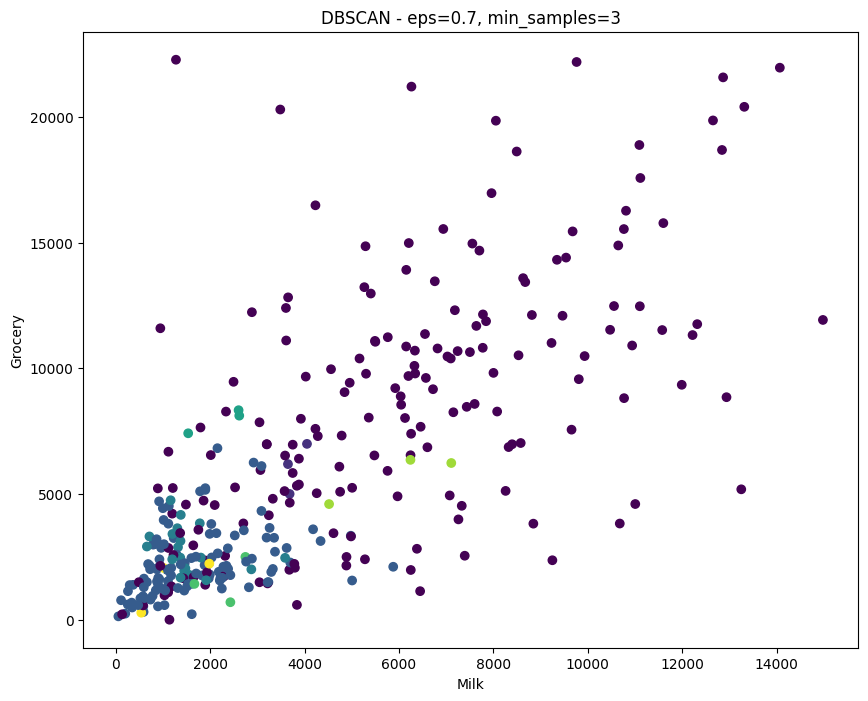

Para eps=0.7 y min_samples=3:
cluster
-1    183
 1    114
 2     20
 0      3
 5      3
 3      3
 4      3
 6      3
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


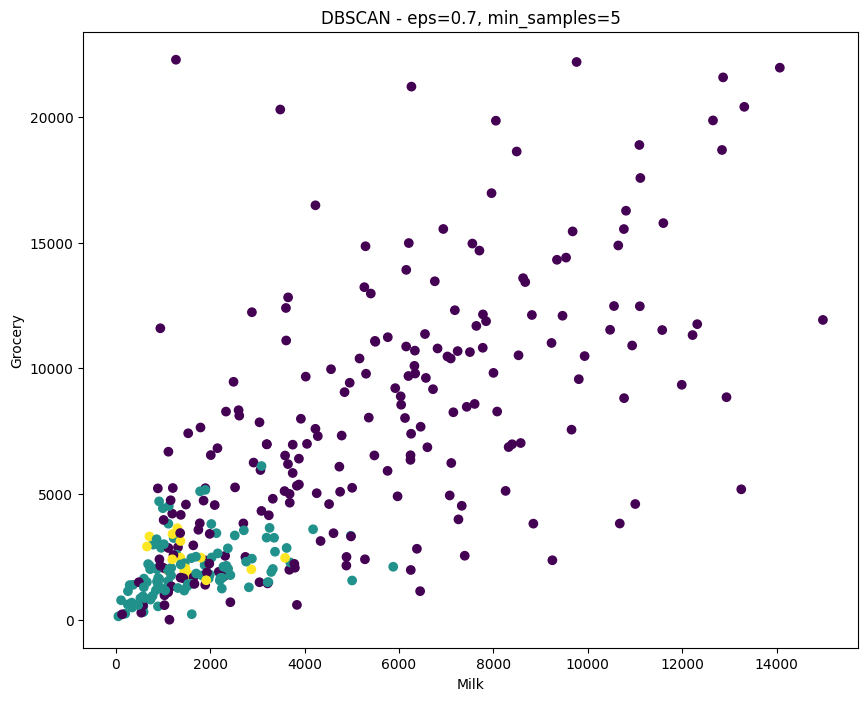

Para eps=0.7 y min_samples=5:
cluster
-1    213
 0    104
 1     15
Name: count, dtype: int64


<ipython-input-8-ca4f57f31dcb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


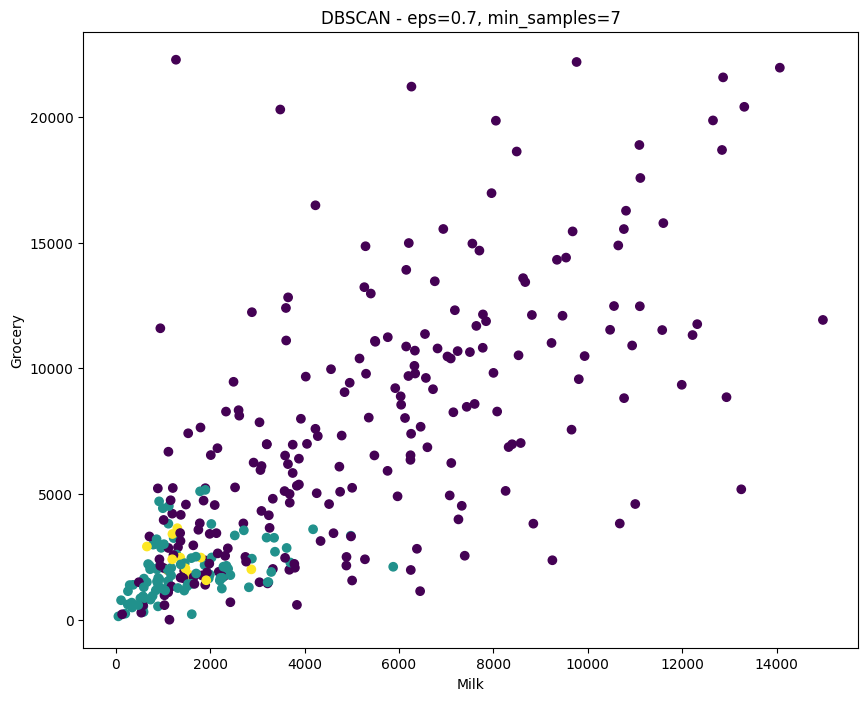

Para eps=0.7 y min_samples=7:
cluster
-1    226
 0     95
 1     11
Name: count, dtype: int64


In [8]:
import matplotlib.pyplot as plt

# Visualización de los clusters (ejemplo con dos variables)
plt.figure(figsize=(10, 8))
plt.scatter(df_outliers['Milk'], df_outliers['Grocery'], c=df_outliers['cluster'], cmap='viridis')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Clusters DBSCAN')
plt.colorbar(label='Cluster')
plt.show()


# Visualización de los outliers (puedes usar diferentes variables para la visualización)
outliers = df_outliers[df_outliers['cluster'] == -1]  # -1 representa los outliers
plt.figure(figsize=(10, 8))
plt.scatter(df_outliers['Milk'], df_outliers['Grocery'], c=df_outliers['cluster'], cmap='viridis')
plt.scatter(outliers['Milk'], outliers['Grocery'], c='red', label='Outliers') # Resalta los outliers en rojo
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('Clusters DBSCAN con Outliers')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Puedes experimentar con diferentes combinaciones de variables para visualizar los clusters y outliers

#Para probar diferentes valores de epsilon y min_samples
eps_values = [0.3, 0.5, 0.7]  # Ejemplos de valores para epsilon
min_samples_values = [3, 5, 7] # Ejemplos de valores para min_samples

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(datos_escalados_no_outliers)
        df_outliers['cluster'] = clusters

        # Visualización (puedes adaptarla a tu gusto)
        plt.figure(figsize=(10, 8))
        plt.scatter(df_outliers['Milk'], df_outliers['Grocery'], c=df_outliers['cluster'], cmap='viridis')
        plt.title(f'DBSCAN - eps={eps}, min_samples={min_samples}')
        plt.xlabel('Milk')
        plt.ylabel('Grocery')
        plt.show()
        print(f"Para eps={eps} y min_samples={min_samples}:")
        print(df_outliers['cluster'].value_counts())

Correlation between Fresh and cluster assignment: -0.03527090310036986
Correlation between Milk and cluster assignment: -0.4996248318617744
Correlation between Grocery and cluster assignment: -0.4877993308156159
Correlation between Frozen and cluster assignment: -0.06163542235292282
Correlation between Detergents_Paper and cluster assignment: -0.4429264067740951
Correlation between Delicassen and cluster assignment: -0.3389415655662953


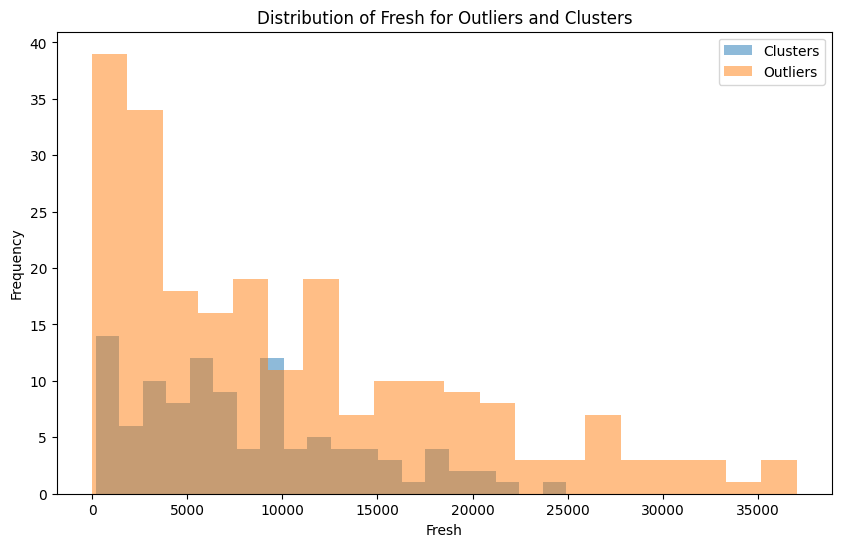

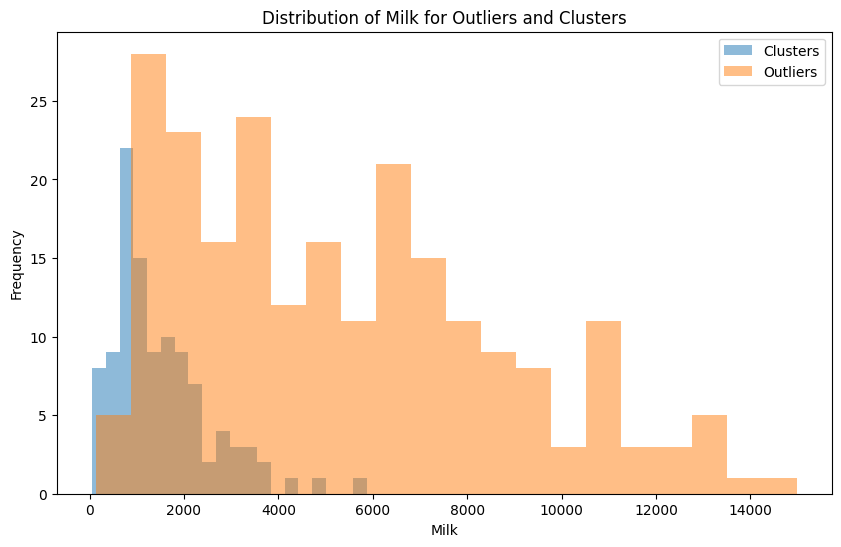

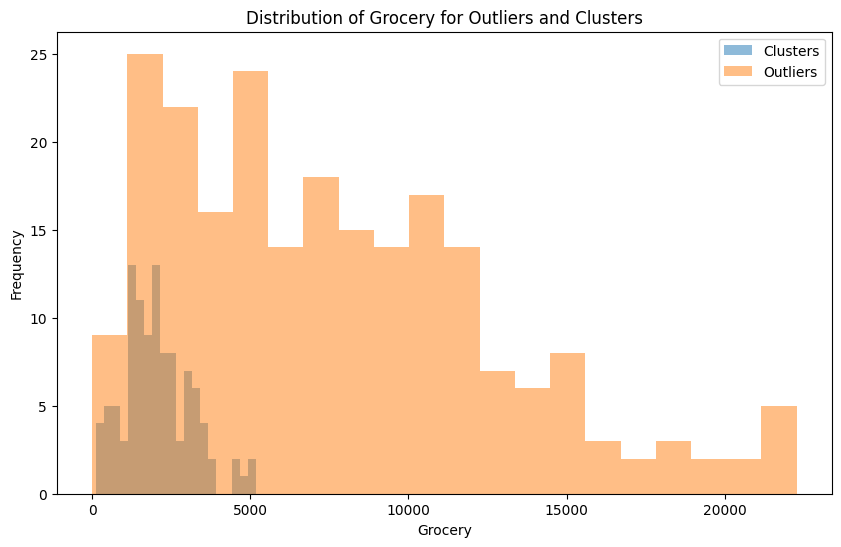

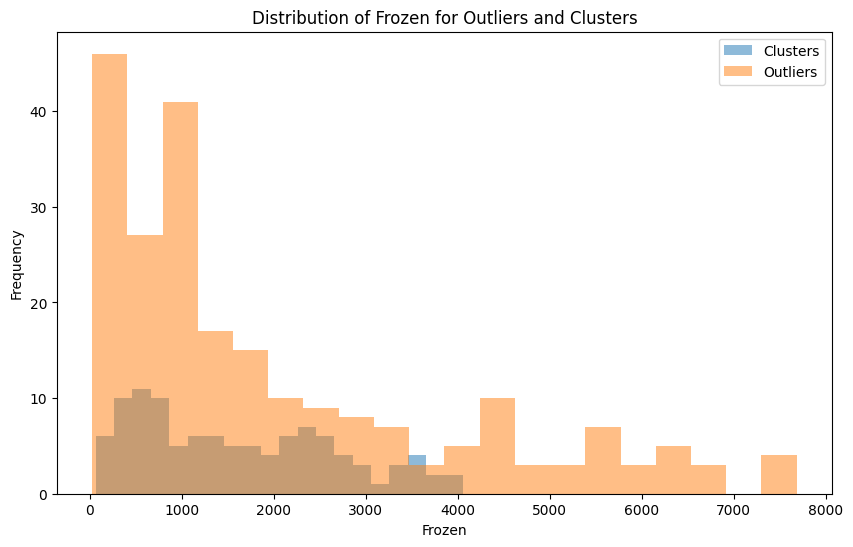

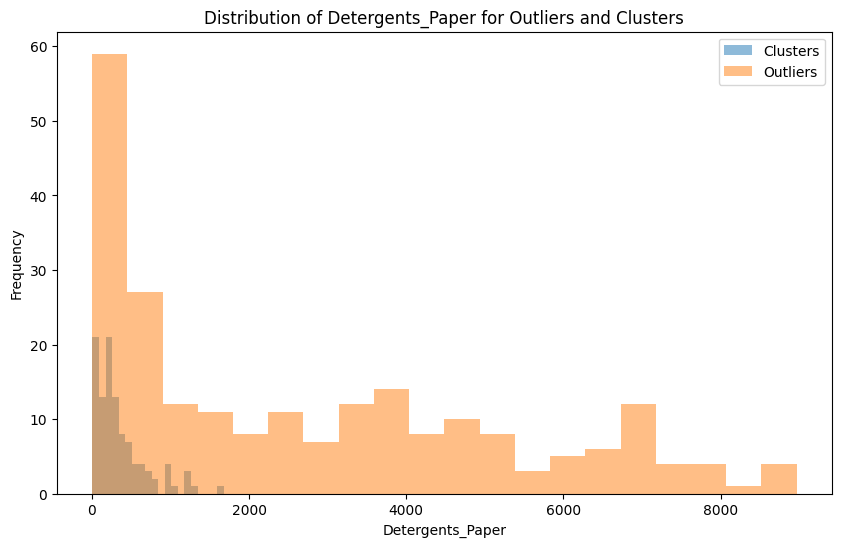

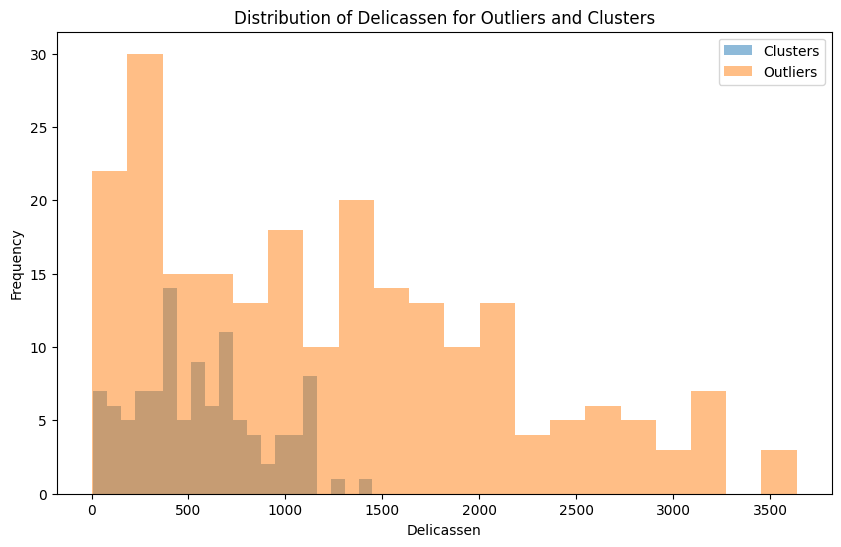

In [9]:
# prompt: ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# ... (previous code)

# Analyze correlation between variables and clusters
# Calculate the correlation between each variable and the cluster assignment.
for col in variables_importantes:
    correlation = df_outliers[col].corr(df_outliers['cluster'])
    print(f"Correlation between {col} and cluster assignment: {correlation}")


# Analyze outlier distribution
# Get the indices of the outliers
outlier_indices = df_outliers[df_outliers['cluster'] == -1].index

# Function to plot variable distributions for outliers and clusters
def plot_variable_distributions(variable):
    plt.figure(figsize=(10, 6))
    plt.hist(df_outliers.loc[~df_outliers.index.isin(outlier_indices), variable], alpha=0.5, label='Clusters', bins=20)
    plt.hist(df_outliers.loc[outlier_indices, variable], alpha=0.5, label='Outliers', bins=20)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {variable} for Outliers and Clusters')
    plt.legend()
    plt.show()

# Plot distributions for key variables
for col in variables_importantes:
    plot_variable_distributions(col)

In [ ]:
# prompt: Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.
#   – Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?

# Análisis de la calidad del agrupamiento y la naturaleza de los outliers

# Evaluación de la calidad del agrupamiento
# Dado que DBSCAN no proporciona una métrica de calidad intrínseca como k-means (inercia),
# la evaluación se basa en la interpretación visual de los clusters y la distribución de los datos.
# La elección de eps y min_samples es crucial y debe ajustarse a los datos.  Un buen agrupamiento muestra
# clusters separados con pocos o ningún punto en las fronteras.  Los experimentos con diferentes parámetros
# ayudan a encontrar la mejor configuración para los datos.


# Naturaleza de los outliers
# Los outliers en DBSCAN (-1) son puntos de datos que no pertenecen a ningún cluster.
# En este contexto comercial, estos clientes podrían ser:
# 1. Clientes únicos con comportamientos inusuales: Compran cantidades significativamente diferentes
#    de productos en comparación con otros clientes. Podrían tener necesidades específicas no cubiertas
#    por las estrategias de marketing actuales.
# 2. Posibles oportunidades de negocio: Si los outliers representan un segmento con un gasto alto en
#    productos específicos, podrían ser una oportunidad para desarrollar productos o servicios
#    personalizados para este nicho.
# 3. Riesgos potenciales: Si los outliers gastan muy poco o muestran patrones de compra erráticos,
#    podrían ser considerados riesgos para el negocio.  Un análisis más profundo de estos clientes podría
#    ayudar a comprender sus motivaciones y a desarrollar estrategias para mejorar su lealtad o, si es necesario,
#    reducir su impacto negativo.

# Análisis adicional:
# - Para una evaluación más completa, se pueden utilizar métricas externas como el índice de silueta si se conoce la
#   verdadera agrupación.
# - El análisis de los perfiles de los clientes atípicos (variables demográficas, ubicación, etc., si disponibles) proporciona
#   información adicional sobre sus características.
# - Se puede probar otros algoritmos de agrupación (como k-means, hierarchical clustering) y comparar los resultados.


# El código ya incluye la visualización de la distribución de las variables para los outliers y los clusters.
# Examinar estas distribuciones proporciona una manera visual de comparar los outliers con los diferentes clusters.

<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


Para eps=0.3 y min_samples=3, no se puede calcular silhouette score (solo un cluster o ruido).


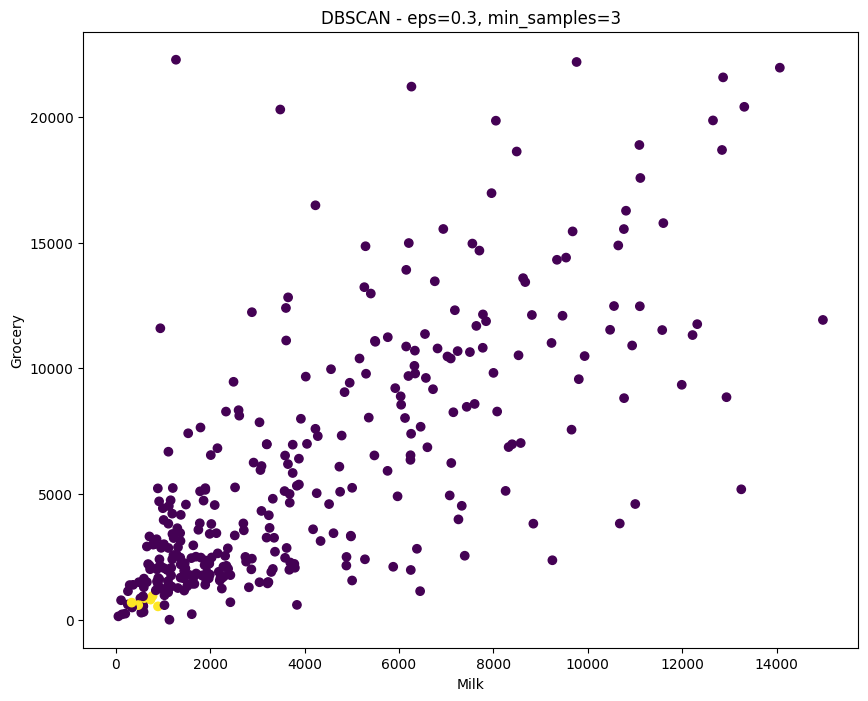

Para eps=0.3 y min_samples=3:
cluster
-1    326
 0      6
Name: count, dtype: int64
Para eps=0.3 y min_samples=5, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


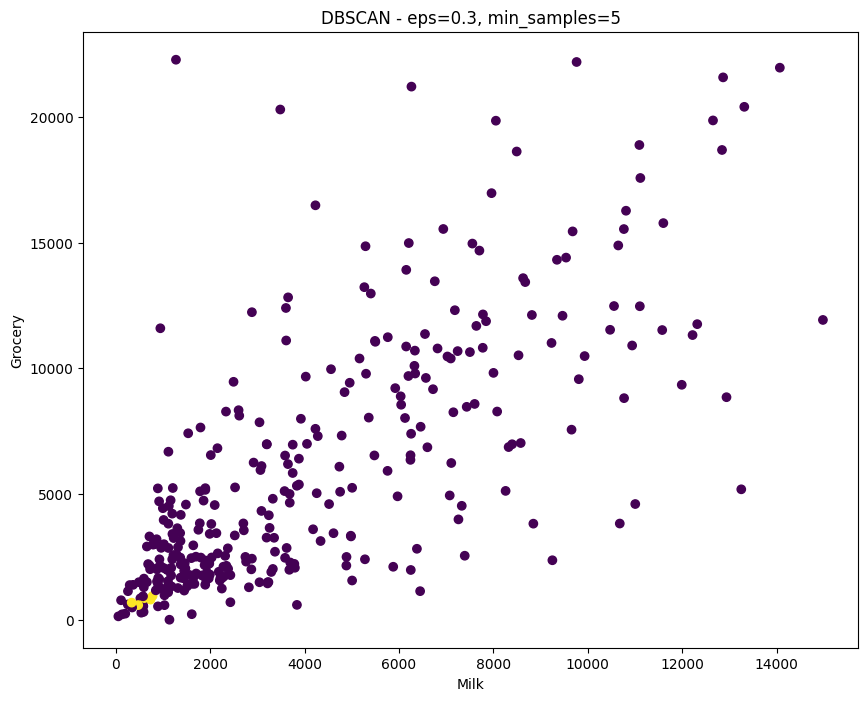

Para eps=0.3 y min_samples=5:
cluster
-1    327
 0      5
Name: count, dtype: int64
Para eps=0.3 y min_samples=7, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


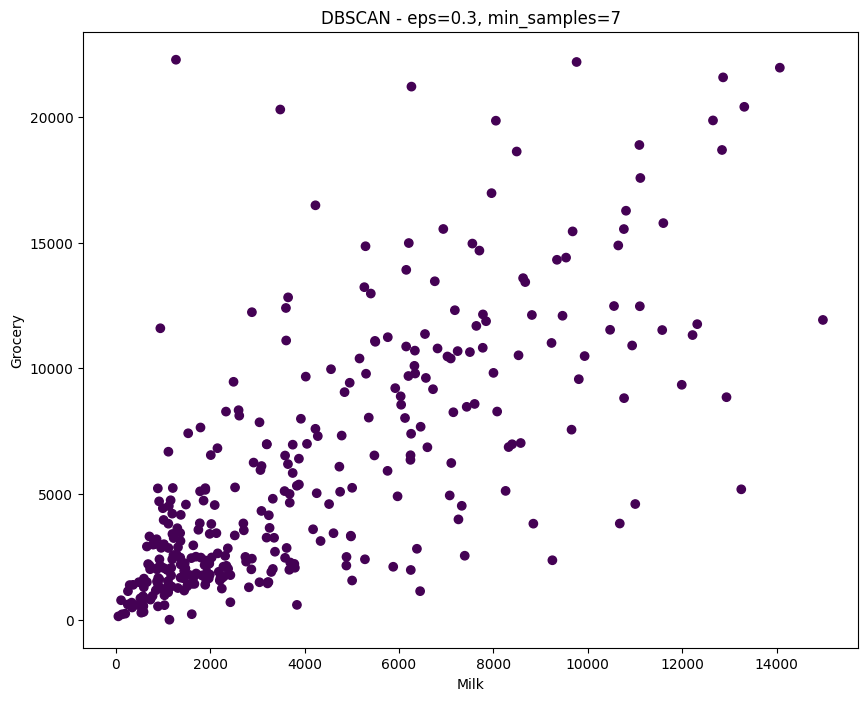

Para eps=0.3 y min_samples=7:
cluster
-1    332
Name: count, dtype: int64
Para eps=0.5 y min_samples=3, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


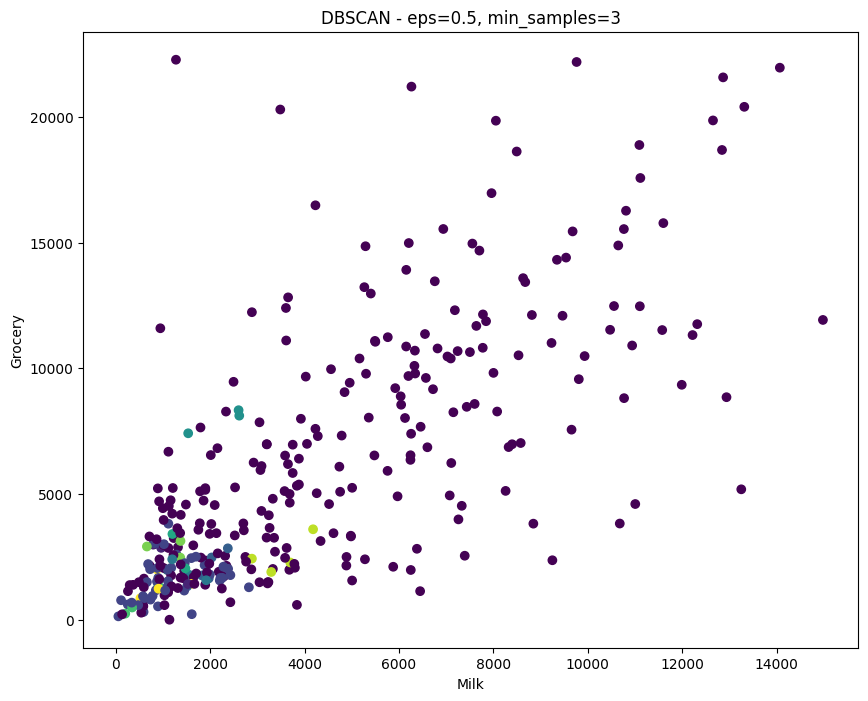

Para eps=0.5 y min_samples=3:
cluster
-1    256
 1     44
 2      6
 9      4
 8      4
 0      3
 4      3
 3      3
 5      3
 6      3
 7      3
Name: count, dtype: int64
Para eps=0.5 y min_samples=5, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


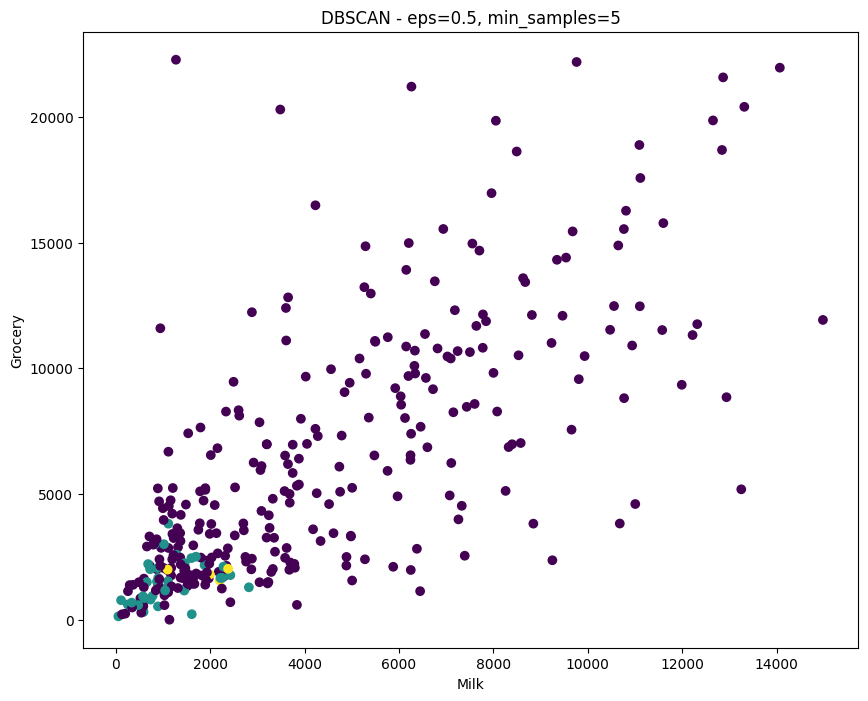

Para eps=0.5 y min_samples=5:
cluster
-1    291
 0     37
 1      4
Name: count, dtype: int64
Para eps=0.5 y min_samples=7, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


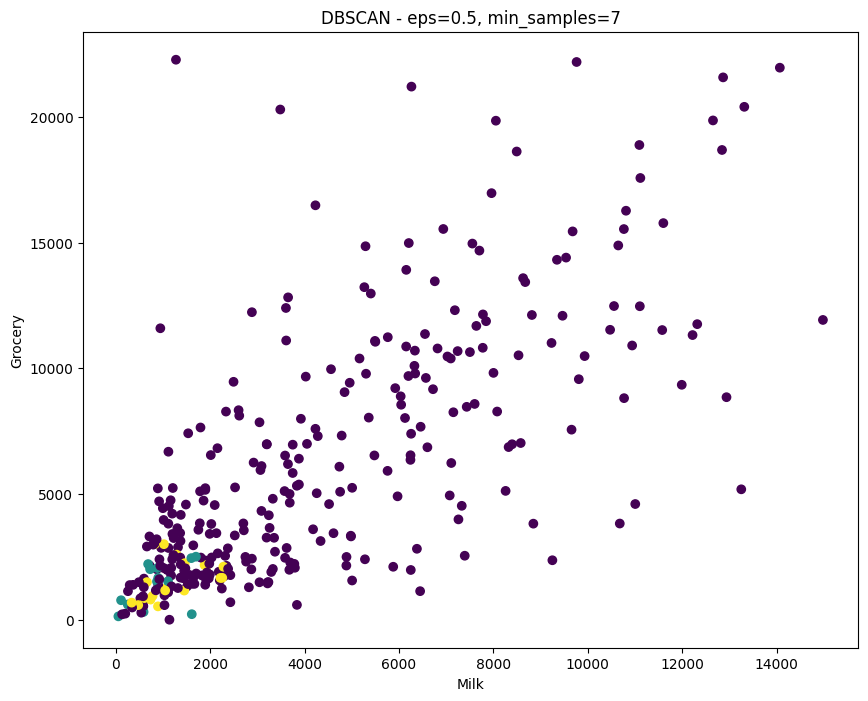

Para eps=0.5 y min_samples=7:
cluster
-1    299
 1     19
 0     14
Name: count, dtype: int64
Para eps=0.7 y min_samples=3, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


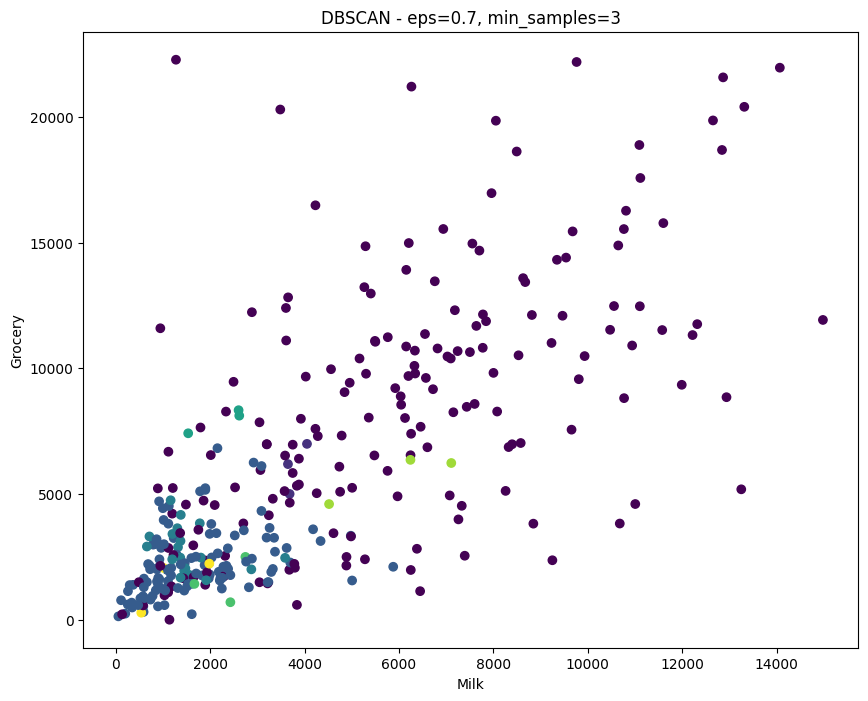

Para eps=0.7 y min_samples=3:
cluster
-1    183
 1    114
 2     20
 0      3
 5      3
 3      3
 4      3
 6      3
Name: count, dtype: int64
Para eps=0.7 y min_samples=5, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


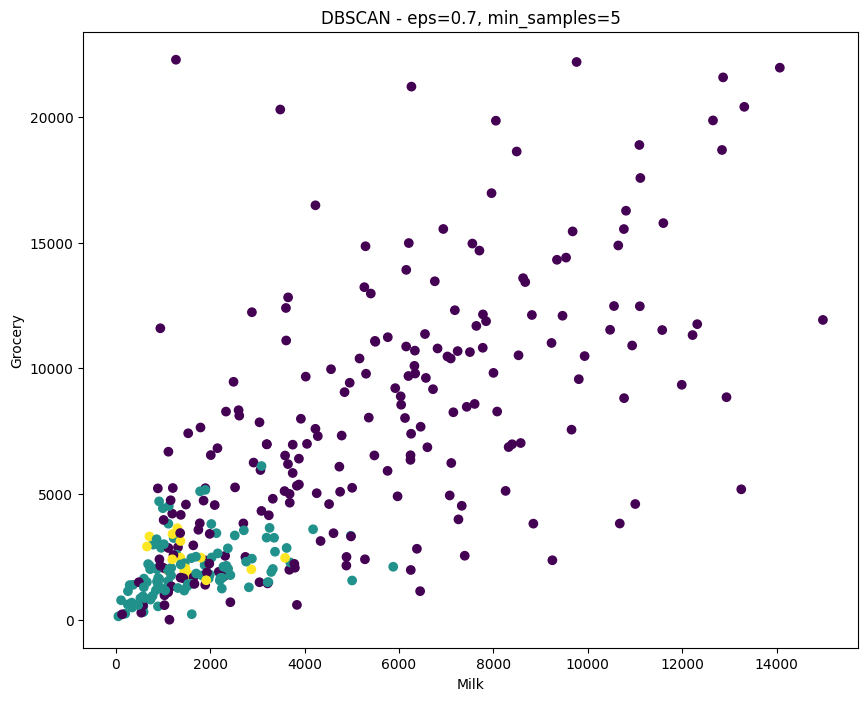

Para eps=0.7 y min_samples=5:
cluster
-1    213
 0    104
 1     15
Name: count, dtype: int64
Para eps=0.7 y min_samples=7, no se puede calcular silhouette score (solo un cluster o ruido).


<ipython-input-10-79308740f857>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers['cluster'] = clusters


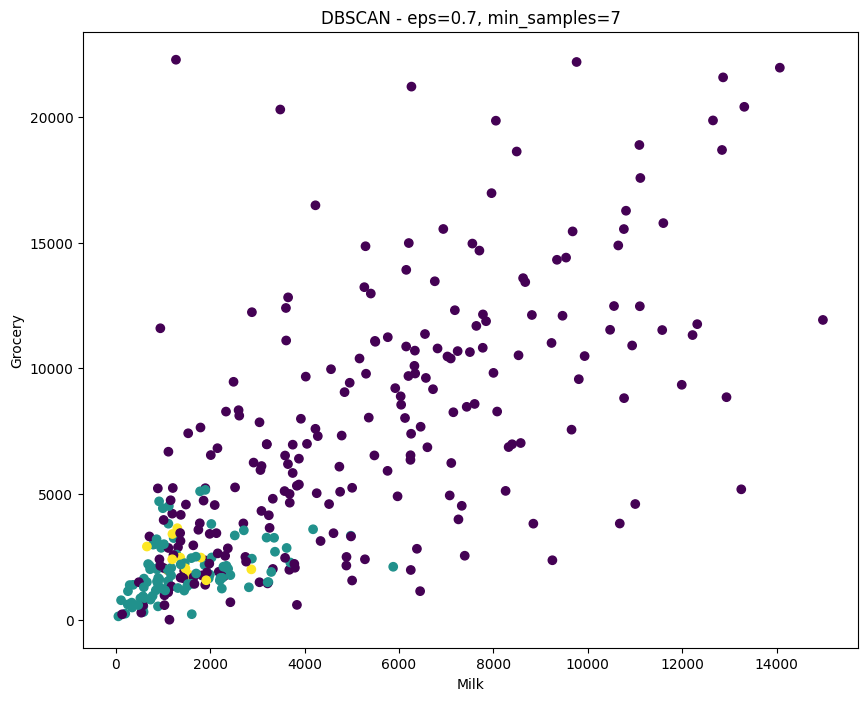

Para eps=0.7 y min_samples=7:
cluster
-1    226
 0     95
 1     11
Name: count, dtype: int64

Mejores parámetros: eps=None, min_samples=None, silhouette score=-1

## Reporte de Agrupamiento con DBSCAN
Se utilizó el algoritmo DBSCAN para agrupar a los clientes del dataset.
Después de varios experimentos utilizando diferentes valores para los hiperparámetros, se encontro que el valor óptimo de epsilon es None y el óptimo para min_samples es None.
Estos parámetros se seleccionaron después de evaluar diferentes combinaciones, utilizando el silhouette score como indicador de la calidad del clustering, obteniendo el valor de -1.
Considerando que DBSCAN no siempre genera clusters compactos, esta métrica sirve como una referencia general.


In [10]:
# prompt: realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.
#   – Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.

from sklearn.metrics import silhouette_score

# ... (previous code)


#Para probar diferentes valores de epsilon y min_samples y calcular el silhouette score
eps_values = [0.3, 0.5, 0.7]  # Ejemplos de valores para epsilon
min_samples_values = [3, 5, 7] # Ejemplos de valores para min_samples

best_eps = None
best_min_samples = None
best_silhouette = -1  # Initialize with a value less than any possible silhouette score

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(datos_escalados_no_outliers)
        df_outliers['cluster'] = clusters

        # Calcular el silhouette score solo si hay más de un cluster
        if len(set(clusters)) > 1 and -1 not in clusters: # Excluimos el caso en que solo hay ruido
          silhouette_avg = silhouette_score(datos_escalados_no_outliers, clusters)
          print(f"Para eps={eps} y min_samples={min_samples}, el silhouette score es: {silhouette_avg}")

          if silhouette_avg > best_silhouette:
              best_silhouette = silhouette_avg
              best_eps = eps
              best_min_samples = min_samples
        else:
          print(f"Para eps={eps} y min_samples={min_samples}, no se puede calcular silhouette score (solo un cluster o ruido).")

        # Visualización (puedes adaptarla a tu gusto)
        plt.figure(figsize=(10, 8))
        plt.scatter(df_outliers['Milk'], df_outliers['Grocery'], c=df_outliers['cluster'], cmap='viridis')
        plt.title(f'DBSCAN - eps={eps}, min_samples={min_samples}')
        plt.xlabel('Milk')
        plt.ylabel('Grocery')
        plt.show()
        print(f"Para eps={eps} y min_samples={min_samples}:")
        print(df_outliers['cluster'].value_counts())


print(f"\nMejores parámetros: eps={best_eps}, min_samples={best_min_samples}, silhouette score={best_silhouette}")


#Reporte
print("\n## Reporte de Agrupamiento con DBSCAN")
print(f"Se utilizó el algoritmo DBSCAN para agrupar a los clientes del dataset.")
print(f"Después de varios experimentos utilizando diferentes valores para los hiperparámetros, se encontro que el valor óptimo de epsilon es {best_eps} y el óptimo para min_samples es {best_min_samples}.")
print(f"Estos parámetros se seleccionaron después de evaluar diferentes combinaciones, utilizando el silhouette score como indicador de la calidad del clustering, obteniendo el valor de {best_silhouette}.")
print(f"Considerando que DBSCAN no siempre genera clusters compactos, esta métrica sirve como una referencia general.")

# Análisis de los clusters (ejemplo - Adapta según tus observaciones)
# ... (Agregar análisis basado en visualizaciones y estadísticas descriptivas de los clusters)

# Análisis de los outliers (ejemplo - Adapta según tus observaciones)
# ... (Agregar análisis de la distribución de los outliers y posibles interpretaciones comerciales)